In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from adjustText import adjust_text

import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/marcus/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [47]:
grey = (187/255, 187/255, 187/255)
darkgreen = (51/255, 117/255, 56/255)
teal = (93/255, 168/255, 153/255)
blue = (148/255, 203/255, 236/255)
yellow = (220/255, 205/255, 125/255)
red = (168/255, 96/255, 93/255)
pale_yellow = (164/255, 168/255, 93/255)

color_pallete = sns.color_palette([grey, darkgreen, teal, blue, yellow, red, pale_yellow])

In [32]:
feedback_df = pd.read_csv('../Menagerie/data/grades.csv', index_col=0)
feedback_df

,assignment_number,comments,skill,participant_id,batch,grade
0,18.0,The code use meaningful identifier names and a...,Readability,15,1,B+
1,620.0,Code is well organized into logical classes an...,Readability,15,1,A+
2,466.0,"The code is well-organized, consistently inden...",Readability,15,1,A-
3,591.0,The code is well organized and readable. Inden...,Readability,15,1,A-
4,587.0,The code is well organized and readable. Inden...,Readability,15,1,A-
...,...,...,...,...,...,...
15,58.0,NaN,Documentation,14,1,A++
16,353.0,NaN,Documentation,14,1,A++
17,422.0,NaN,Documentation,14,1,A++
18,480.0,NaN,Documentation,14,1,A++


# Consistency
## Individual graders

In [33]:
DUPLICATE_MAP = {
    680: 144,
    681: 559,
    682: 97,
    683: 358,
    684: 389,
    685: 160,
    686: 176
}

In [34]:
intra_rater_df = feedback_df[feedback_df['assignment_number'].isin(list(DUPLICATE_MAP.keys())+list(DUPLICATE_MAP.values()))][['assignment_number', 'skill', 'participant_id', 'batch', 'comments']]
intra_rater_df.to_csv('../data/intra_rater.csv', index=False)
intra_rater_df

,assignment_number,skill,participant_id,batch,comments
12,358.0,Readability,15,1,The code is generally clean and organized with...
12,358.0,Correctness,15,1,All of the base tasks are completed - the simu...
12,358.0,Code Elegance,15,1,The code demonstrates good use of classes and ...
12,358.0,Documentation,15,1,"Most classes and functions have clear, useful ..."
0,160.0,Readability,24,1,The student used indentation appropriately and...
...,...,...,...,...,...
19,144.0,Documentation,1,1,Code is documented well.
12,358.0,Readability,14,1,there are a few instances where naming consist...
12,358.0,Correctness,14,1,NaN
12,358.0,Code Elegance,14,1,NaN



### Length of comments

In [35]:
intra_rater_df['length'] = intra_rater_df['comments'].str.len()
intra_rater_df['length'] = intra_rater_df['length'].fillna(0)
intra_rater_df

,assignment_number,skill,participant_id,batch,comments,length
12,358.0,Readability,15,1,The code is generally clean and organized with...,129.0
12,358.0,Correctness,15,1,All of the base tasks are completed - the simu...,533.0
12,358.0,Code Elegance,15,1,The code demonstrates good use of classes and ...,231.0
12,358.0,Documentation,15,1,"Most classes and functions have clear, useful ...",150.0
0,160.0,Readability,24,1,The student used indentation appropriately and...,84.0
...,...,...,...,...,...,...
19,144.0,Documentation,1,1,Code is documented well.,24.0
12,358.0,Readability,14,1,there are a few instances where naming consist...,88.0
12,358.0,Correctness,14,1,NaN,0.0
12,358.0,Code Elegance,14,1,NaN,0.0


In [49]:
NOTICED_DUP = [1, 2, 10, 11, 20, 25]

In [50]:
sns.set(rc={'text.usetex': True})

def underline(input):
    return r'\underline{%s}' %input

underline(10)

'\\underline{10}'

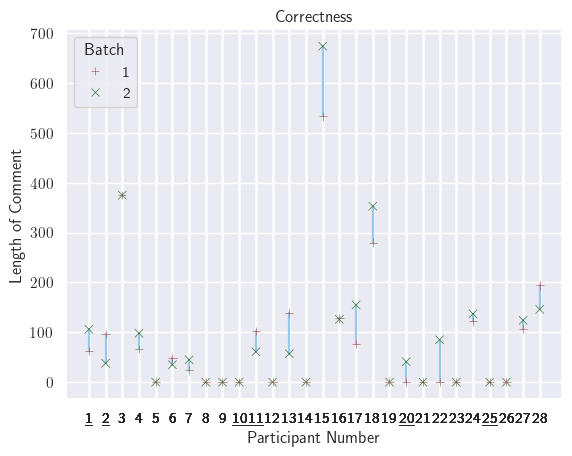

In [51]:
dist_plt = sns.scatterplot(intra_rater_df[(intra_rater_df['skill'] == 'Correctness')], x='participant_id', y='length', style='batch', hue='batch', palette=sns.color_palette([red, darkgreen]), markers=['+', 'x'], zorder=5)

for index, row in intra_rater_df[intra_rater_df['skill'] == 'Correctness'].iterrows():
    participant_id = row['participant_id']
    length_1 = intra_rater_df[(intra_rater_df['skill'] == 'Correctness') & (intra_rater_df['participant_id'] == participant_id) & (intra_rater_df['batch'] == 1)]['length']

    length_2 = intra_rater_df[(intra_rater_df['skill'] == 'Correctness') & (intra_rater_df['participant_id'] == participant_id) & (intra_rater_df['batch'] == 2)]['length']

    line = dist_plt.plot([participant_id, participant_id], [length_1, length_2])
    plt.setp(line, color=blue)

dist_plt.set(ylabel='Length of Comment', xlabel='Participant Number', title='Correctness', xticks=intra_rater_df['participant_id'])
dist_plt.legend(title='Batch', loc='upper left')
temp_ticks = dist_plt.get_xticks()
temp_ticks = [underline(x) if x in NOTICED_DUP else x for x in temp_ticks]
dist_plt.set_xticklabels(temp_ticks)

dist_plt.get_figure().savefig('plots/feedback_correctness_distance.pdf', bbox_inches='tight')

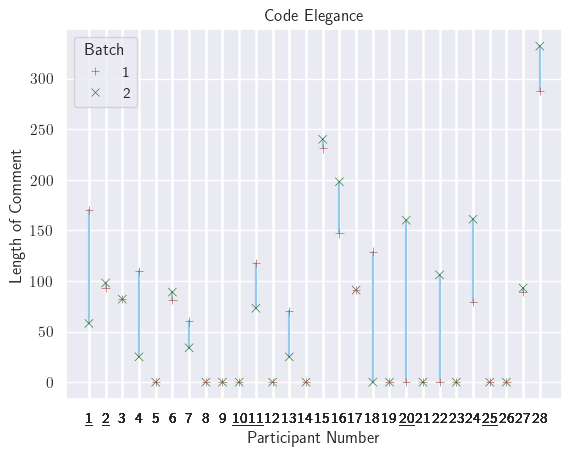

In [52]:
dist_plt = sns.scatterplot(intra_rater_df[(intra_rater_df['skill'] == 'Code Elegance')], x='participant_id', y='length', style='batch', hue='batch', palette=sns.color_palette([red, darkgreen]), markers=['+', 'x'], zorder=5)

for index, row in intra_rater_df[intra_rater_df['skill'] == 'Code Elegance'].iterrows():
    participant_id = row['participant_id']
    length_1 = intra_rater_df[(intra_rater_df['skill'] == 'Code Elegance') & (intra_rater_df['participant_id'] == participant_id) & (intra_rater_df['batch'] == 1)]['length']

    length_2 = intra_rater_df[(intra_rater_df['skill'] == 'Code Elegance') & (intra_rater_df['participant_id'] == participant_id) & (intra_rater_df['batch'] == 2)]['length']

    line = dist_plt.plot([participant_id, participant_id], [length_1, length_2])
    plt.setp(line, color=blue)

dist_plt.set(ylabel='Length of Comment', xlabel='Participant Number', title='Code Elegance', xticks=intra_rater_df['participant_id'])
dist_plt.legend(title='Batch')
temp_ticks = dist_plt.get_xticks()
temp_ticks = [underline(x) if x in NOTICED_DUP else x for x in temp_ticks]
dist_plt.set_xticklabels(temp_ticks)

dist_plt.get_figure().savefig('plots/feedback_code_elegance_distance.pdf', bbox_inches='tight')

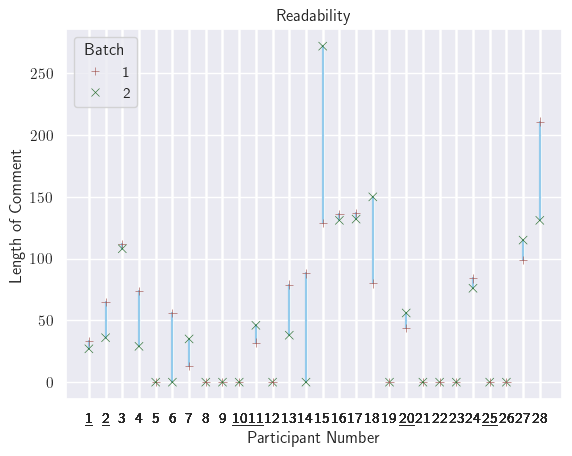

In [54]:
dist_plt = sns.scatterplot(intra_rater_df[(intra_rater_df['skill'] == 'Readability')], x='participant_id', y='length', style='batch', hue='batch', palette=sns.color_palette([red, darkgreen]), markers=['+', 'x'], zorder=5)

for index, row in intra_rater_df[intra_rater_df['skill'] == 'Readability'].iterrows():
    participant_id = row['participant_id']
    length_1 = intra_rater_df[(intra_rater_df['skill'] == 'Readability') & (intra_rater_df['participant_id'] == participant_id) & (intra_rater_df['batch'] == 1)]['length']

    length_2 = intra_rater_df[(intra_rater_df['skill'] == 'Readability') & (intra_rater_df['participant_id'] == participant_id) & (intra_rater_df['batch'] == 2)]['length']

    line = dist_plt.plot([participant_id, participant_id], [length_1, length_2])
    plt.setp(line, color=blue)

dist_plt.set(ylabel='Length of Comment', xlabel='Participant Number', title='Readability', xticks=intra_rater_df['participant_id'])
dist_plt.legend(title='Batch', loc='upper left')

temp_ticks = dist_plt.get_xticks()
temp_ticks = [underline(x) if x in NOTICED_DUP else x for x in temp_ticks]
dist_plt.set_xticklabels(temp_ticks)

dist_plt.get_figure().savefig('plots/feedback_readability_distance.pdf', bbox_inches='tight')

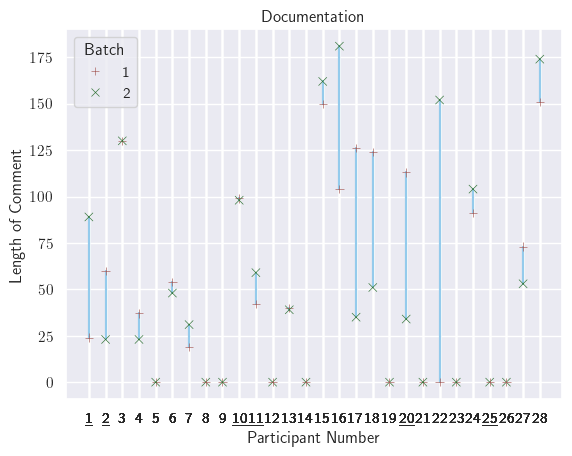

In [66]:
dist_plt = sns.scatterplot(intra_rater_df[(intra_rater_df['skill'] == 'Documentation')], x='participant_id',  y='length', style='batch', hue='batch', palette=sns.color_palette([red, darkgreen]), markers=['+', 'x'], zorder=5)

for index, row in intra_rater_df[intra_rater_df['skill'] == 'Documentation'].iterrows():
    participant_id = row['participant_id']
    length_1 = intra_rater_df[(intra_rater_df['skill'] == 'Documentation') & (intra_rater_df['participant_id'] == participant_id) & (intra_rater_df['batch'] == 1)]['length']

    length_2 = intra_rater_df[(intra_rater_df['skill'] == 'Documentation') & (intra_rater_df['participant_id'] == participant_id) & (intra_rater_df['batch'] == 2)]['length']

    line = dist_plt.plot([participant_id, participant_id], [length_1, length_2])
    plt.setp(line, color=blue)

dist_plt.set(ylabel='Length of Comment', xlabel='Participant Number', title='Documentation', xticks=intra_rater_df['participant_id'])
dist_plt.legend(title='Batch')
temp_ticks = dist_plt.get_xticks()
temp_ticks = [underline(x) if x in NOTICED_DUP else x for x in temp_ticks]
dist_plt.set_xticklabels(temp_ticks)

dist_plt.get_figure().savefig('plots/feedback_documentation_distance.pdf', bbox_inches='tight')
sns.set(rc={'text.usetex': False})

### Comment Similarity

In [17]:
sim_df = pd.read_csv('../data/similarity_analysis_output.csv')
sim_df

,assignment_number,skill,participant_id,feedback_1,feedback_2,sim
0,97.0,Code Elegance,11,Good usage of organism abstract class. animals...,"good abstraction level, code is not rewritten ...",0.475714
1,97.0,Correctness,11,unclear what the natural disasters do; they ju...,core and challenging tasks completed. added na...,0.522516
2,97.0,Documentation,10,This submission is completely identical to the...,This submission is completely identical to the...,0.899581
3,97.0,Documentation,11,documented well. every function is defined,documentation is clear and defines every class...,0.743613
4,97.0,Readability,11,code is clean and simple to read,code is clear and follows consistent structure,0.662336
...,...,...,...,...,...,...
64,559.0,Correctness,7,It is basically correct.,Some efforts have been put into this project.,0.078713
65,559.0,Documentation,6,Missing return and parameter comments for some...,Missing param comment in method header comments,0.660806
66,559.0,Documentation,7,Better than others.,"It is good, though not perfect.",0.454978
67,559.0,Readability,6,"Good variable naming, public used where could ...",No comment supplied,0.068642


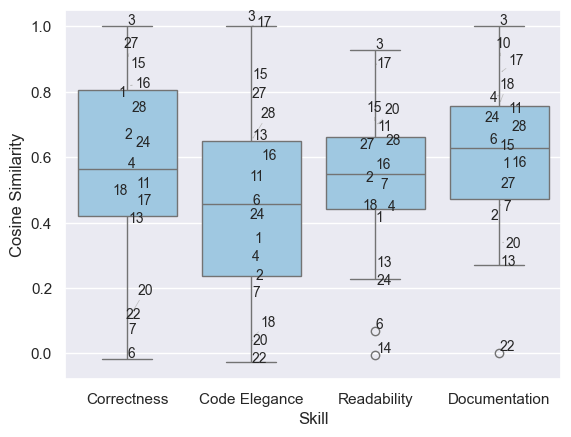

In [99]:
g = sns.boxplot(sim_df, x='skill', y='sim', color=blue, order=['Correctness', 'Code Elegance', 'Readability', 'Documentation'])

texts = [plt.text(sim_df["skill"][i], sim_df["sim"][i], str(sim_df["participant_id"][i]), fontsize=10) for i in range(len(sim_df["skill"]))]

adjust_text(
    texts,
    arrowprops=dict(arrowstyle="->", color=grey, lw=0.5)  # Optional arrows
)

g.set_xlabel('Skill')
g.set_ylabel('Cosine Similarity')

g.get_figure().savefig('plots/feedback_similarity_graph.pdf', bbox_inches='tight')